In [1]:
import numpy as np
import matplotlib.pyplot as plt
import em_second_lib

In [2]:
dist_ratio = 0.5

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.5] # Направление прибытия (DOA) в радианах
theta1_deg = np.rad2deg(theta1_rad[0]) # Направление прибытия (DOA) в градусах
P_1 = 1 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация шума
Q_1 = 1.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
S1 = em_second_lib.gss(Num_emitters1, sample_size1, P_1)
n1 = em_second_lib.gss(Num_sensors1, sample_size1, Q_1)
X1 = (A1 @ S1.T + n1.T).T

In [4]:
X1_with_mv = em_second_lib.MCAR(X1, [2,4], [40, 40])

In [5]:
theta_list = np.linspace(-np.pi/2, np.pi/2, 181)
P = {}
lkhd = {}

In [6]:
for theta in theta_list:
    P[theta], lkhd[theta] = em_second_lib.multi_start_EM(theta, X1_with_mv, 1, Q_1, 1, max_iter=20, eps=1e-6)

0-th start
Initial theta = -1.5707963267948966
likelihood is -1023.1857334945179 on iteration 0
likelihood is -993.9207555289125 on iteration 1
likelihood is -980.7881234510514 on iteration 2
likelihood is -973.63105391523 on iteration 3
likelihood is -969.7742525970981 on iteration 4
likelihood is -967.688087329211 on iteration 5
likelihood is -966.5085244851824 on iteration 6
likelihood is -965.7995392033899 on iteration 7
likelihood is -965.3479034862974 on iteration 8
likelihood is -965.0459869235447 on iteration 9
likelihood is -964.8362543516614 on iteration 10
likelihood is -964.685996580741 on iteration 11
likelihood is -964.5755243412775 on iteration 12
likelihood is -964.4923942042217 on iteration 13
likelihood is -964.4284338983603 on iteration 14
likelihood is -964.378121815007 on iteration 15
likelihood is -964.3376524000118 on iteration 16
likelihood is -964.3043672941902 on iteration 17
likelihood is -964.276392640176 on iteration 18
likelihood is -964.2523992191773 on i

In [7]:
P

{np.float64(-1.5707963267948966): array([[0.05875985+2.40883744e-18j]]),
 np.float64(-1.5533430342749532): array([[0.0587846-3.58870919e-17j]]),
 np.float64(-1.53588974175501): array([[0.05885834+5.16419047e-17j]]),
 np.float64(-1.5184364492350666): array([[0.05897951-4.241941e-18j]]),
 np.float64(-1.5009831567151233): array([[0.0591455-1.86455669e-16j]]),
 np.float64(-1.4835298641951802): array([[0.0593525-3.54913581e-16j]]),
 np.float64(-1.4660765716752369): array([[0.05959543+4.49835481e-16j]]),
 np.float64(-1.4486232791552935): array([[0.05986781+4.44522891e-18j]]),
 np.float64(-1.4311699866353502): array([[0.06016161+5.59665161e-16j]]),
 np.float64(-1.413716694115407): array([[0.0604671-1.10751252e-15j]]),
 np.float64(-1.3962634015954636): array([[0.06077274-1.51300413e-15j]]),
 np.float64(-1.3788101090755203): array([[0.06106507-1.87772974e-15j]]),
 np.float64(-1.361356816555577): array([[0.06132863-2.21209769e-15j]]),
 np.float64(-1.3439035240356336): array([[0.06154606-3.611477

In [8]:
lkhd

{np.float64(-1.5707963267948966): np.float64(-964.2523992191773),
 np.float64(-1.5533430342749532): np.float64(-964.248582907153),
 np.float64(-1.53588974175501): np.float64(-964.237211305128),
 np.float64(-1.5184364492350666): np.float64(-964.2185192487873),
 np.float64(-1.5009831567151233): np.float64(-964.1929074631363),
 np.float64(-1.4835298641951802): np.float64(-964.1609561522023),
 np.float64(-1.4660765716752369): np.float64(-964.1234431605905),
 np.float64(-1.4486232791552935): np.float64(-964.0813657373848),
 np.float64(-1.4311699866353502): np.float64(-964.0359645151652),
 np.float64(-1.413716694115407): np.float64(-963.9887478132308),
 np.float64(-1.3962634015954636): np.float64(-963.9415137896891),
 np.float64(-1.3788101090755203): np.float64(-963.8963673254109),
 np.float64(-1.361356816555577): np.float64(-963.8557278700512),
 np.float64(-1.3439035240356336): np.float64(-963.8223238895447),
 np.float64(-1.3264502315156905): np.float64(-963.7991691278143),
 np.float64(-1.3

In [9]:
x = list(lkhd.keys())
y = list(lkhd.values())

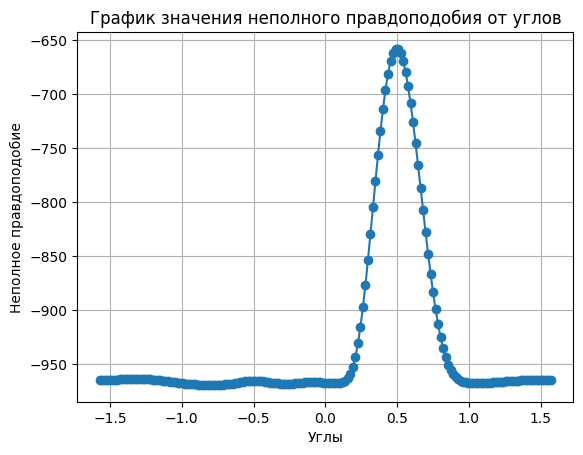

In [12]:
plt.plot(x, y, marker='o')  # marker='o' для отображения точек
plt.xlabel('Углы')
plt.ylabel('Неполное правдоподобие')
plt.title('График значения неполного правдоподобия от углов')
plt.grid()  # добавим сетку
plt.show()

In [11]:
max(y)

np.float64(-658.5189023823584)